In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

import os
import pandas as pd
import random

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier


import pickle

## Dataset combined

In [46]:
def Extract_5Min_Data(Folder, OutPut_Folder ,label = 0):
    for file in os.listdir(Folder):
        if file.endswith(".csv"):
            filePath = os.path.join(Folder, file)
            df = pd.read_csv(filePath)[:630]
            df["Class"] = label
            new_FileName = file
            output_Path = os.path.join(OutPut_Folder, new_FileName)
            df.to_csv(output_Path, index = False)
      
mimic_af_folder = "mimic_perform_af_csv"
output_af_Folder = "data/raw_data/Output_AF/"
Extract_5Min_Data(mimic_af_folder, output_af_Folder)

mimic_non_af_folder = "mimic_perform_non_af_csv"
output_non_af_Folder = "data/raw_data/Output_Non_AF/"
Extract_5Min_Data(mimic_non_af_folder, output_non_af_Folder, 1)

In [47]:
def make_Dataset(folder1, folder2):
    folderList = [folder1, folder2]
    combine_df = pd.DataFrame()

    for folder in folderList:
        for file in os.listdir(folder):
            if file.endswith(".csv"):
                filePath = os.path.join(folder, file)
                df = pd.read_csv(filePath)
                combine_df = pd.concat([combine_df, df])

    combine_df = combine_df.sample(frac=1)  # Shuffle the DataFrame
    output_Path = "PPG_Signals.csv"
    combine_df.to_csv(output_Path, index=False)

make_Dataset(output_af_Folder, output_non_af_Folder)

## Loading Dataset + Preprocessing

In [48]:
df = pd.read_csv('PPG_Signals.csv')
df.head()

,Time,PPG,ECG,resp,Class
0,3.264,0.414467,0.365325,-0.207831,0
1,1.048,0.266667,0.515625,NaN,1
2,1.216,0.266667,0.382812,NaN,0
3,2.544,2.384164,0.264907,-0.914089,0
4,2.984,0.650049,0.689453,0.148583,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22050 entries, 0 to 22049
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    22050 non-null  float64
 1   PPG     21742 non-null  float64
 2   ECG     22050 non-null  float64
 3   resp    16380 non-null  float64
 4   Class   22050 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 861.5 KB


In [50]:
df.isnull().sum()

Time        0
PPG       308
ECG         0
resp     5670
Class       0
dtype: int64

In [51]:
df["PPG"].fillna(df["PPG"].mean(), inplace = True)
df["resp"].fillna(df["resp"].mean(), inplace = True)

df.drop("Time", axis = 1, inplace = True)

C:\Users\muham\AppData\Local\Temp\ipykernel_16572\3427237663.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["PPG"].fillna(df["PPG"].mean(), inplace = True)
C:\Users\muham\AppData\Local\Temp\ipykernel_16572\3427237663.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [52]:
df.isnull().sum()

PPG      0
ECG      0
resp     0
Class    0
dtype: int64

In [53]:
df.head()

,PPG,ECG,resp,Class
0,0.414467,0.365325,-0.207831,0
1,0.266667,0.515625,0.221509,1
2,0.266667,0.382812,0.221509,0
3,2.384164,0.264907,-0.914089,0
4,0.650049,0.689453,0.148583,1


## Correlation

           PPG       ECG      resp
PPG   1.000000 -0.089126 -0.045083
ECG  -0.089126  1.000000  0.021625
resp -0.045083  0.021625  1.000000


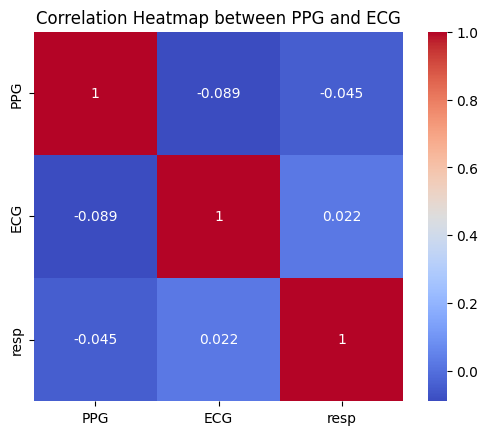

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['PPG', 'ECG', 'resp']].corr()

print(correlation_matrix)

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap between PPG and ECG')
plt.show()

Split

In [55]:
X = df.drop("Class", axis = 1)
y = df["Class"]

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.dtypes)
print(X_train.isnull().sum())

PPG     float64
ECG     float64
resp    float64
dtype: object
PPG     0
ECG     0
resp    0
dtype: int64


## Model

In [57]:
model_Acc_List = []
model_Name_List = ["RFClassifier", "KNClassifier", "ABClassifier", "SGDClassifier"]

Random Forest

In [58]:
clf = RandomForestClassifier(random_state=50)
clf.fit(X_train, y_train)

predic = clf.predict(X_test)

acc = accuracy_score(predic, y_test)
model_Acc_List.append(acc)
print(f"Acc = {acc}")

report = classification_report(predic, y_test)
print(report)

# Save the RandomForestClassifier model using pickle
with open("models/RandomForestClassifier_model.pkl", "wb") as f:
    pickle.dump(clf, f)

Acc = 0.9016078054143191
              precision    recall  f1-score   support

           0       0.91      0.91      0.91      3965
           1       0.89      0.89      0.89      3312

    accuracy                           0.90      7277
   macro avg       0.90      0.90      0.90      7277
weighted avg       0.90      0.90      0.90      7277



KNeighborsClassifier

In [59]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

predic = model.predict(X_test)
acc = accuracy_score(predic, y_test)

model_Acc_List.append(acc)
print("Acc : ", acc)

report = classification_report(predic, y_test)
print(report)

# Save the KNeighborsClassifier model using pickle
with open("models/KNeighborsClassifier_model.pkl", "wb") as f:
    pickle.dump(model, f)

Acc :  0.8715129861206541
              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3970
           1       0.86      0.86      0.86      3307

    accuracy                           0.87      7277
   macro avg       0.87      0.87      0.87      7277
weighted avg       0.87      0.87      0.87      7277



AdaBoostClassifier

In [60]:
model = AdaBoostClassifier()
model.fit(X_train, y_train)

predic = model.predict(X_test)

acc = accuracy_score(predic, y_test)
model_Acc_List.append(acc)
print("Acc : ", acc)

report = classification_report(predic, y_test)
print(report)

# Save the AdaBoostClassifier model using pickle
with open("models/AdaBoostClassifier_model.pkl", "wb") as f:
    pickle.dump(model, f)

c:\Users\muham\OneDrive\Desktop\Portfolio\Websites\AFIB extractor\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Acc :  0.7393156520544181
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      4010
           1       0.71      0.72      0.71      3267

    accuracy                           0.74      7277
   macro avg       0.74      0.74      0.74      7277
weighted avg       0.74      0.74      0.74      7277



SGDClassifier

In [61]:
model = SGDClassifier()

model.fit(X_train, y_train)
predic = model.predict(X_test)

acc = accuracy_score(predic, y_test)
model_Acc_List.append(acc)
print("Acc : ", acc)

report = classification_report(predic, y_test)
print(report)

# Save the SGDClassifier model using pickle
with open("models/SGDClassifier_model.pkl", "wb") as f:
    pickle.dump(model, f)

Acc :  0.5448673904081353
              precision    recall  f1-score   support

           0       1.00      0.54      0.71      7277
           1       0.00      0.00      0.00         0

    accuracy                           0.54      7277
   macro avg       0.50      0.27      0.35      7277
weighted avg       1.00      0.54      0.71      7277



c:\Users\muham\OneDrive\Desktop\Portfolio\Websites\AFIB extractor\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\muham\OneDrive\Desktop\Portfolio\Websites\AFIB extractor\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\muham\OneDrive\Desktop\Portfolio\Websites\AFIB extractor\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

## Results

In [62]:
print(model_Acc_List)
print(model_Name_List)

[0.9016078054143191, 0.8715129861206541, 0.7393156520544181, 0.5448673904081353]
['RFClassifier', 'KNClassifier', 'ABClassifier', 'SGDClassifier']


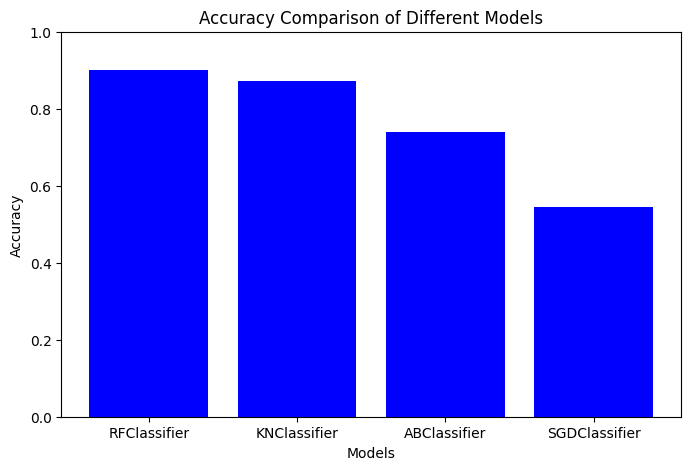

In [63]:
plt.figure(figsize=(8, 5))
plt.bar(model_Name_List, model_Acc_List, color='blue')
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

## Random forest is best answer